In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd
import scipy.io
import numpy as np
import copy

import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
# from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3))

[0.33150734 0.08022311 0.03531764]


In [ ]:
#model1 = tf.keras.models.load_model('/content/drive/MyDrive/ML/H&U_classification/lstm/model_v4.h5')
#history=np.load('/content/drive/MyDrive/ML/H&U_classification/lstm/ver4_history.npy',allow_pickle='TRUE').item()

x_test1 = np.loadtxt('/content/drive/MyDrive/ML/H&U_classification/lstm/xtest_data_ver4.csv', delimiter=',')
y_test1 = np.loadtxt('/content/drive/MyDrive/ML/H&U_classification/lstm/ytest_data_ver4.csv', delimiter=',')
x_train1 = np.loadtxt('/content/drive/MyDrive/ML/H&U_classification/lstm/xtrain_data_ver4.csv', delimiter=',')
y_train1 = np.loadtxt('/content/drive/MyDrive/ML/H&U_classification/lstm/ytrain_data_ver4.csv', delimiter=',')

In [ ]:
import tensorflow.keras.layers as tfl
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
def create_model(param):
    model = Sequential()
    model.add(tfl.Conv1D(filters=32,
                    kernel_size=7,
                    strides=1,
                    padding='same',
            input_shape=(1024,1)))
   
    model.add(tfl.Conv1D(filters=8,
                    kernel_size=3,
                    strides=1,
                    padding='same', activation='relu'))
    model.add(tfl.MaxPool1D(pool_size= 16,
                       padding='same'))
    model.add(tfl.Conv1D(filters=16,
                    kernel_size=2,
                    strides=1,
                    padding='same'))
    model.add(tfl.Dropout(0.4))
    model.add(tfl.Conv1D(filters=8,
                    kernel_size=2,
                    strides=1,
                    padding='same',activation='relu'))
    model.add(tfl.MaxPool1D(pool_size= 4,
                       padding='same'))
    model.add(tfl.Flatten())
    model.add(tfl.Dense(param, activation='relu'))
    model.add(tfl.Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'adam',
                  loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
import tensorflow.keras.layers as tfl
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
def create_model(param):
    model = Sequential()
    model.add(keras.Input(shape=(1024,1)))
    model.add(Conv1D(filters=32,
                        kernel_size=7,
                        strides=1,
                        padding='same'))
    model.add(Conv1D(filters=16,
                        kernel_size=9,
                        strides=1,
                        padding='same'))
    # model.add(MaxPooling1D(pool_size= 16,
                          #  padding='same'))
    model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
    # model.add(MaxPooling1D(pool_size=8))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D


kfold = KFold(n_splits=5, shuffle=True, random_state=1) 
fold_no = 1
acc_per_fold1 = []
loss_per_fold1 = []
for train, test in kfold.split(x_train1,  y_train1):
    model1 = Sequential()
    model1.add(keras.Input(shape=(1024,1)))
    model1.add(Conv1D(filters=32,
                        kernel_size=7,
                        strides=1,
                        padding='same'))
    model1.add(Conv1D(filters=16,
                        kernel_size=9,
                        strides=1,
                        padding='same'))
    # model.add(MaxPooling1D(pool_size= 16,
                          #  padding='same'))
    model1.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
    # model.add(MaxPooling1D(pool_size=8))
    model1.add(LSTM(100))                               ############### parameter
    model1.add(Dense(1, activation='sigmoid'))
    model1.compile(optimizer = 'adam',
                  loss='binary_crossentropy',
              metrics=['accuracy'])
    

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    
    # Fit data to model
    history1 = model1.fit(x_train1[train], y_train1[train],
                batch_size=75,
                epochs=50)

    # Generate generalization metrics
    scores1 = model1.evaluate(x_train1[test], y_train1[test], verbose=0)
    print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores1[0]}; {model1.metrics_names[1]} of {scores1[1]*100}%')
    acc_per_fold1.append(scores1[1] * 100)
    loss_per_fold1.append(scores1[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
80/80 [==============================] - 15s 159ms/step - loss: 0.6986 - accuracy: 0.5143
Epoch 2/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6886 - accuracy: 0.5270
Epoch 3/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6776 - accuracy: 0.5731
Epoch 4/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6756 - accuracy: 0.5761
Epoch 5/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6661 - accuracy: 0.6018
Epoch 6/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6639 - accuracy: 0.5988
Epoch 7/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6869 - accuracy: 0.5452
Epoch 8/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6694 - accuracy: 0.5842
Epoch 9/50
80/80 [==============================] - 13s 158ms/step - loss: 0.6673 - accuracy: 0

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold1)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold1[i]} - Accuracy: {acc_per_fold1[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold1)} (+- {np.std(acc_per_fold1)})')
print(f'> Loss: {np.mean(loss_per_fold1)}')
print('------------------------------------------------------------------------')

np.savetxt('/content/drive/MyDrive/ML/Hyper_opti/dense_param100_50.csv', acc_per_fold1, delimiter=',')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.2632414400577545 - Accuracy: 90.18816947937012%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.25652632117271423 - Accuracy: 89.58333134651184%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.21064546704292297 - Accuracy: 91.5994644165039%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.22364060580730438 - Accuracy: 91.3306474685669%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.2802598476409912 - Accuracy: 89.51612710952759%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 90.44354796409607 (+- 0.8704468527023358)
> Loss: 0.24686273634433747
--------------------------

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D


kfold = KFold(n_splits=5, shuffle=True, random_state=1) 
fold_no = 1
acc_per_fold2 = []
loss_per_fold2 = []
for train, test in kfold.split(x_train1,y_train1):
    model2 = Sequential()
    model2.add(keras.Input(shape=(1024,1)))
    model2.add(Conv1D(filters=32,
                        kernel_size=7,
                        strides=1,
                        padding='same'))
    model2.add(Conv1D(filters=16,
                        kernel_size=9,
                        strides=1,
                        padding='same'))
    # model.add(MaxPooling1D(pool_size= 16,
                          #  padding='same'))
    model2.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
    # model.add(MaxPooling1D(pool_size=8))
    model2.add(LSTM(16))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(optimizer = 'adam',
                  loss='binary_crossentropy',
              metrics=['accuracy'])
    

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    
    # Fit data to model
    history2 = model2.fit(x_train1[train], y_train1[train],
                batch_size=75,
                epochs=50)

    # Generate generalization metrics
    scores2 = model2.evaluate(x_train1[test], y_train1[test], verbose=0)
    print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores2[0]}; {model2.metrics_names[1]} of {scores2[1]*100}%')
    acc_per_fold2.append(scores2[1] * 100)
    loss_per_fold2.append(scores2[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
80/80 [==============================] - 66s 792ms/step - loss: 0.6955 - accuracy: 0.5151
Epoch 2/50
80/80 [==============================] - 61s 757ms/step - loss: 0.6920 - accuracy: 0.5156
Epoch 3/50
80/80 [==============================] - 55s 685ms/step - loss: 0.6902 - accuracy: 0.5265
Epoch 4/50
80/80 [==============================] - 53s 663ms/step - loss: 0.6867 - accuracy: 0.5439
Epoch 5/50
80/80 [==============================] - 53s 658ms/step - loss: 0.6844 - accuracy: 0.5460
Epoch 6/50
80/80 [==============================] - 53s 664ms/step - loss: 0.6818 - accuracy: 0.5623
Epoch 7/50
80/80 [==============================] - 54s 673ms/step - loss: 0.6789 - accuracy: 0.5662
Epoch 8/50
80/80 [==============================] - 54s 672ms/step - loss: 0.6737 - accuracy: 0.5848
Epoch 9/50
80/80 [==============================] - 54s 671ms/step - loss: 0.6702 - accuracy: 0

KeyboardInterrupt: ignored

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold2)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold2[i]} - Accuracy: {acc_per_fold2[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold2)} (+- {np.std(acc_per_fold2)})')
print(f'> Loss: {np.mean(loss_per_fold2)}')
print('------------------------------------------------------------------------')

np.savetxt('/content/drive/MyDrive/ML/Hyper_opti/lstm_param16_50.csv', acc_per_fold2, delimiter=',')

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D


kfold = KFold(n_splits=5, shuffle=True, random_state=1) 
fold_no = 1
acc_per_fold3 = []
loss_per_fold3 = []
for train, test in kfold.split(x_train1,y_train1):
    model3 = Sequential()
    model3.add(keras.Input(shape=(1024,1)))
    model3.add(Conv1D(filters=32,
                        kernel_size=7,
                        strides=1,
                        padding='same'))
    model3.add(Conv1D(filters=16,
                        kernel_size=9,
                        strides=1,
                        padding='same'))
    # model.add(MaxPooling1D(pool_size= 16,
                          #  padding='same'))
    model3.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
    # model.add(MaxPooling1D(pool_size=8))
    model3.add(LSTM(128))
    model3.add(Dense(1, activation='sigmoid'))
    model3.compile(optimizer = 'adam',
                  loss='binary_crossentropy',
              metrics=['accuracy'])
    

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    
    # Fit data to model
    history3 = model3.fit(x_train1[train], y_train1[train],
                batch_size=75,
                epochs=50)

    # Generate generalization metrics
    scores3 = model3.evaluate(x_train1[test], y_train1[test], verbose=0)
    print(f'Score for fold {fold_no}: {model3.metrics_names[0]} of {scores3[0]}; {model3.metrics_names[1]} of {scores3[1]*100}%')
    acc_per_fold3.append(scores3[1] * 100)
    loss_per_fold3.append(scores3[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
80/80 [==============================] - 16s 176ms/step - loss: 0.7018 - accuracy: 0.5143
Epoch 2/50
80/80 [==============================] - 14s 174ms/step - loss: 0.6853 - accuracy: 0.5465
Epoch 3/50
80/80 [==============================] - 14s 174ms/step - loss: 0.6742 - accuracy: 0.5790
Epoch 4/50
80/80 [==============================] - 14s 174ms/step - loss: 0.6718 - accuracy: 0.5820
Epoch 5/50
80/80 [==============================] - 14s 174ms/step - loss: 0.6617 - accuracy: 0.5959
Epoch 6/50
80/80 [==============================] - 14s 173ms/step - loss: 0.6685 - accuracy: 0.5963
Epoch 7/50
80/80 [==============================] - 14s 174ms/step - loss: 0.6793 - accuracy: 0.5654
Epoch 8/50
80/80 [==============================] - 14s 174ms/step - loss: 0.6721 - accuracy: 0.5793
Epoch 9/50
80/80 [==============================] - 14s 175ms/step - loss: 0.6639 - accuracy: 0

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold3)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold3[i]} - Accuracy: {acc_per_fold3[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold3)} (+- {np.std(acc_per_fold3)})')
print(f'> Loss: {np.mean(loss_per_fold3)}')
print('------------------------------------------------------------------------')


np.savetxt('/content/drive/MyDrive/ML/Hyper_opti/dense_param128_50.csv', acc_per_fold3, delimiter=',')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.22350606322288513 - Accuracy: 90.52419066429138%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.2819095551967621 - Accuracy: 89.6505355834961%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.2124524712562561 - Accuracy: 91.06183052062988%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.5700452923774719 - Accuracy: 75.40322542190552%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.30838850140571594 - Accuracy: 88.70967626571655%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 87.06989169120789 (+- 5.887741081300559)
> Loss: 0.3192603766918182
----------------------------

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D


kfold = KFold(n_splits=5, shuffle=True, random_state=1) 
fold_no = 1
acc_per_fold4 = []
loss_per_fold4 = []
for train, test in kfold.split(x_train1,y_train1):
    model4 = Sequential()
    model4.add(keras.Input(shape=(1024,1)))
    model4.add(Conv1D(filters=32,
                        kernel_size=7,
                        strides=1,
                        padding='same'))
    model4.add(Conv1D(filters=16,
                        kernel_size=9,
                        strides=1,
                        padding='same'))
    # model.add(MaxPooling1D(pool_size= 16,
                          #  padding='same'))
    model4.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
    # model.add(MaxPooling1D(pool_size=8))
    model4.add(LSTM(256))
    model4.add(Dense(1, activation='sigmoid'))
    model4.compile(optimizer = 'adam',
                  loss='binary_crossentropy',
              metrics=['accuracy'])
    

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    
    # Fit data to model
    history4 = model4.fit(x_train1[train], y_train1[train],
                batch_size=75,
                epochs=50)

    # Generate generalization metrics
    scores4 = model4.evaluate(x_train1[test], y_train1[test], verbose=0)
    print(f'Score for fold {fold_no}: {model4.metrics_names[0]} of {scores4[0]}; {model4.metrics_names[1]} of {scores4[1]*100}%')
    acc_per_fold4.append(scores4[1] * 100)
    loss_per_fold4.append(scores4[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
80/80 [==============================] - 25s 283ms/step - loss: 0.7033 - accuracy: 0.5102
Epoch 2/50
80/80 [==============================] - 23s 283ms/step - loss: 0.6911 - accuracy: 0.5420
Epoch 3/50
80/80 [==============================] - 23s 281ms/step - loss: 0.6811 - accuracy: 0.5612
Epoch 4/50
80/80 [==============================] - 23s 282ms/step - loss: 0.6750 - accuracy: 0.5706
Epoch 5/50
80/80 [==============================] - 23s 283ms/step - loss: 0.6756 - accuracy: 0.5689
Epoch 6/50
80/80 [==============================] - 23s 282ms/step - loss: 0.6555 - accuracy: 0.6097
Epoch 7/50
80/80 [==============================] - 23s 281ms/step - loss: 0.6597 - accuracy: 0.5973
Epoch 8/50
80/80 [==============================] - 23s 283ms/step - loss: 0.6779 - accuracy: 0.5541
Epoch 9/50
80/80 [==============================] - 23s 282ms/step - loss: 0.6727 - accuracy: 0

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold4)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold4[i]} - Accuracy: {acc_per_fold4[i]}%')  
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold4)} (+- {np.std(acc_per_fold4)})')
print(f'> Loss: {np.mean(loss_per_fold4)}')
print('------------------------------------------------------------------------')

np.savetxt('/content/drive/MyDrive/ML/Hyper_opti/dense_param256_50.csv', acc_per_fold4, delimiter=',')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.2634943425655365 - Accuracy: 89.11290168762207%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.354265958070755 - Accuracy: 86.82795763015747%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.2541850209236145 - Accuracy: 89.85214829444885%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.19367565214633942 - Accuracy: 92.6075279712677%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.30522263050079346 - Accuracy: 88.70967626571655%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 89.42204236984253 (+- 1.8796073359958347)
> Loss: 0.27416872084140775
---------------------------

[array([78.76344323, 80.64516187, 85.34946442, 85.21505594, 79.9731195 ]), array([88.10483813, 89.24731016, 87.83602118, 87.36559153, 90.45698643]), array([90.18816948, 89.58333135, 91.59946442, 91.33064747, 89.51612711]), array([89.11290169, 86.82795763, 89.85214829, 90.36574125, 88.70967627])]


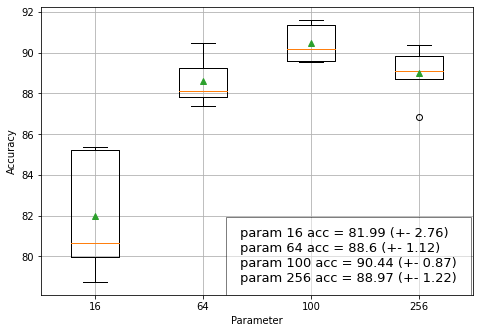

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
data_4 = np.array(acc_per_fold4)
data_1 = np.array(acc_per_fold1)
data_2 = np.array(acc_per_fold2)
data_3 = np.array(acc_per_fold3)
data = [data_2.flatten(), data_3.flatten(), data_1.flatten(), data_4.flatten()]
print(data)
fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
#plt.ylim([60,85])

txtstr = f' param 16 acc = {round(np.mean(acc_per_fold2),2)} (+- {round(np.std(acc_per_fold2),2)}) \n param 64 acc = {round(np.mean(acc_per_fold3),2)} (+- {round(np.std(acc_per_fold3),2)}) \n param 100 acc = {round(np.mean(acc_per_fold1),2)} (+- {round(np.std(acc_per_fold1),2)}) \n param 256 acc = {round(np.mean(acc_per_fold4),2)} (+- {round(np.std(acc_per_fold4),2)})'
plt.text(0.452,0.045,txtstr,fontsize=13, transform=plt.gcf().transFigure, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
bp = ax.boxplot(data, labels=[16, 64, 100,  256], showmeans=True)
plt.xlabel('Parameter')
plt.ylabel('Accuracy')
plt.grid()

#plt.plot(fpr2, tpr2, label='narco (AUC = {:.3f})'.format(auc1))
#plt.legend([f'param 4 acc = {round(np.mean(acc_per_fold16),2)} (+- {round(np.std(acc_per_fold16),2)})' ,
 #           f'param 6 acc = {round(np.mean(acc_per_fold64),2)} (+- {round(np.std(acc_per_fold64),2)})' , 
  #          f'param 16 acc = {round(np.mean(acc_per_fold6),2)} (+- {round(np.std(acc_per_fold6),2)})', 
   #         f'param 64 acc = {round(np.mean(acc_per_fold4),2)} (+- {round(np.std(acc_per_fold4),2)})'], loc='lower left')


plt.savefig("hyper_opti.pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
acc_per_fold3 = np.loadtxt('/content/drive/MyDrive/ML/Hyper_opti/lstm_param64_50.csv', delimiter=',')
acc_per_fold1 = np.loadtxt('/content/drive/MyDrive/ML/Hyper_opti/lstm_param100_50.csv', delimiter=',')
acc_per_fold2 = np.loadtxt('/content/drive/MyDrive/ML/Hyper_opti/lstm_param16_50.csv', delimiter=',')
acc_per_fold4 = np.loadtxt('/content/drive/MyDrive/ML/Hyper_opti/lstm_param256_50.csv', delimiter=',')